In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline



In [14]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

/Users/felixelias/Downloads


In [62]:
df=pd.read_csv('taiwanese_bankruptcy.csv')
df.columns # columns have space in the begining

col_names=[]
for c in df.columns:
    col_names.append(c[1:])
    
col_names[0]='bankrupt'
col_names[0]

#use new names for df
df.columns=col_names

df_s = df.columns[df.columns.str.contains('profit', case=False)].tolist()
print(df_s)

['Operating Profit Rate', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Operating profit/Paid-in capital', 'Net profit before tax/Paid-in capital', 'Operating profit per person', 'Gross Profit to Sales']


In [43]:
#check for missing values
df.isna().sum()

bankrupt                                                   0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

<Axes: title={'center': 'Class Balance'}, xlabel='Bankrupt', ylabel='Frequency'>

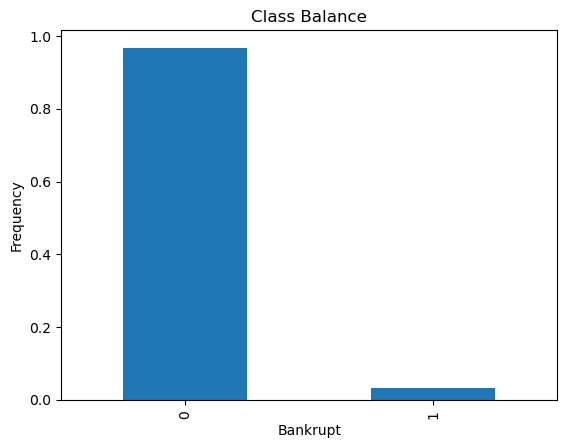

In [46]:
#Inspect the target variable
df['bankrupt'].value_counts(normalize=True).plot(kind='bar', xlabel='Bankrupt', ylabel='Frequency', title='Class Balance')

Figure comments: The graph does show an imbalanced dataset, where our False class is far bigger than our True class.  

In [65]:
#Split the data

target = 'bankrupt'
X = df.drop(columns=target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [66]:
#divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


Given the imbalanced dataset, one strategy that can be used is to use the over-sampling technique which involves increasing the number of observations in the True class by randomly making copies of the existing observations


In [67]:
#over-sampling technique
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [68]:
#model building
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(random_state=42)
clf.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=42)

In [69]:
#cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5)
print(cv_scores)

[0.99243499 0.99432624 0.99432356 0.99668874 0.99432356]


In [70]:
#dictionary of hyperparameters for the model
params = {
    'n_estimators': range(25, 100, 25),  # Number of estimators for RandomForest
    'max_depth': range(10, 50, 10),       # Maximum depth for trees
}

In [71]:
#test different combinations of hyperparameters for a classifier
model = GridSearchCV(
     clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [72]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [73]:
#results
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.650032,0.020444,0.006321,0.001795,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.979196,0.977778,0.980605,0.978713,0.980132,0.979285,0.001007,11
1,1.260833,0.044509,0.012384,0.003490,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.979669,0.979196,0.979659,0.979186,0.979186,0.979379,0.000233,10
2,2.009048,0.067962,0.018457,0.002361,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.979196,0.980142,0.977767,0.979659,0.978240,0.979001,0.000880,12
3,0.771777,0.124184,0.006552,0.002955,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.985343,0.985816,0.990066,0.988647,0.988647,0.987704,0.001817,9
4,1.405343,0.049848,0.014362,0.004642,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.986761,0.987707,0.989593,0.990066,0.987701,0.988366,0.001253,8


In [74]:
#select the best perfoming model
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 50}


# Model Evaluation

In [75]:
acc_train = model.score(X_train, y_train)
acc_test =  model.score(X_test, y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9663


The model did perform perfect usiing the training data which indicates over-fitting. But, when testing the model, it did preform very well with unseen data and the consequenses of overfitting might be irrelevant. 

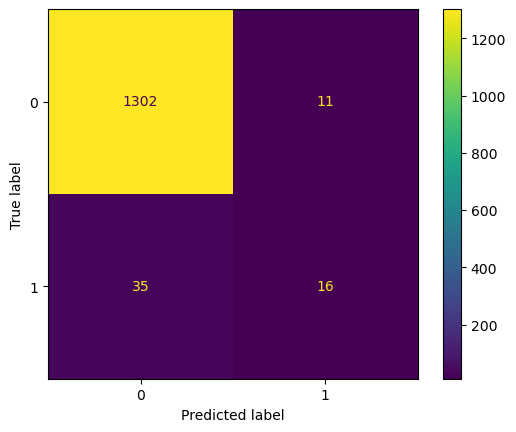

In [76]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [77]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.59      0.31      0.41        51

    accuracy                           0.97      1364
   macro avg       0.78      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364



Class 0 (Negative class):
- Precision: 0.97 — 97% of the time, when the model predicted class 0, it was correct.
- Recall: 0.99 — 99% of the actual class 0 instances were correctly predicted by the model.
- F1-score: 0.98 — A balanced score between precision and recall, indicating excellent overall performance for class 0.
- Support: 1313 — There are 1313 instances of class 0 in the test data.

Class 1 (Positive class):
- Precision: 0.59 — 59% of the time, when the model predicted class 1, it was correct. This is relatively low.
- Recall: 0.31 — Only 31% of the actual class 1 instances were correctly identified by the model. This is quite low, indicating the model  misses a significant portion of positive instances.
- F1-score: 0.41 — This is a moderate score, reflecting the poor performance in both precision and recall for class 1.
- Support: 51 — There are only 51 instances of class 1 in the test data, which is a much smaller number compared to class 0.

Overall Accuracy:
- Accuracy: 0.97 — The model correctly predicted the class for 97% of all instances, which seems very high, but this is heavily influenced by the imbalance in the data (more instances of class 0).

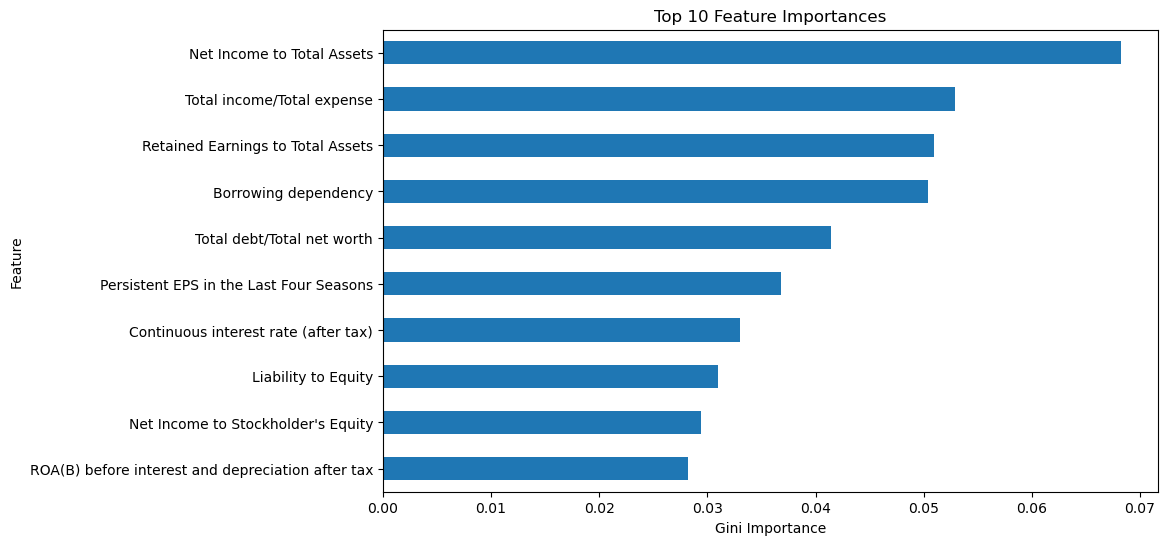

In [89]:
features = X_train_over.columns

# Extract importances directly from the RandomForestClassifier model
importances = model.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot the 10 most important features
feat_imp.sort_values().tail(10).plot(kind='barh', figsize=(10, 6))

# Adding labels and title
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.show()

In [91]:
importances = model.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.sort_values().tail(10)

ROA(B) before interest and depreciation after tax    0.028199
Net Income to Stockholder's Equity                   0.029447
Liability to Equity                                  0.030999
Continuous interest rate (after tax)                 0.033027
Persistent EPS in the Last Four Seasons              0.036779
Total debt/Total net worth                           0.041459
Borrowing dependency                                 0.050397
Retained Earnings to Total Assets                    0.050906
Total income/Total expense                           0.052894
Net Income to Total Assets                           0.068222
dtype: float64

Net Income to Total Assets (Importance: 0.068222):
- This is the most important feature among the last 10, with a relatively high importance score of 0.068222. It suggests that this feature (Net Income relative to Total Assets) has a significant influence on the model's predictions. This makes sense becasue ROA shows the percentage of how profitable a company's assets are generating in revenue. If a company has a low ROA ratio, it could indicate ineffiencies in assets or issues with expences/revenue.

Total income/Total expense (Importance: 0.052894):
- This feature also has a moderate level of importance (0.052894). This suggests that the relationship between total income and total expenses has some effect on the model's output, although it is not as crucial as "Net Income to Total Assets."

Retained Earnings to Total Assets (Importance: 0.050906):
- Similar to the above, this ratio (retained earnings relative to total assets) has moderate importance in predicting the target variable.